In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sparse_benches.csv", index_col=0)
df

,ef_memory_Mib,ef_rank,ef_select,ss_memory_Mib,ss_rank,ss_select
k,,,,,,
6,63.1142,42.061,127.952,386.1900,116.062,75.941
7,59.3000,46.537,122.407,315.1670,108.261,70.177
8,57.4000,49.765,125.338,279.6530,110.033,72.238
9,56.4400,55.948,133.835,261.8970,112.318,82.466
10,55.9600,66.216,151.628,253.0190,130.819,105.059
11,55.7200,86.241,182.948,248.5700,174.271,154.088
12,55.6030,126.099,246.659,246.3600,262.593,246.328
13,55.5440,204.637,374.005,245.2505,445.181,433.752
14,55.5140,204.864,627.980,244.6956,815.927,813.104


In [3]:
mem_max = 1.1 * max([df.ef_memory_Mib.max(), df.ss_memory_Mib.max()])
mem_min = 0.9 * min([df.ef_memory_Mib.min(), df.ss_memory_Mib.min()])
time_max = 1.1 * max([df.ef_rank.max(), df.ef_select.max(), df.ss_rank.max(), df.ss_select.max()])
time_min = 0.9 * min([df.ef_rank.min(), df.ef_select.min(), df.ss_rank.min(), df.ss_select.min()])

In [19]:
def t(x):
    return x

Text(0, 0.5, 'Time (ns)')

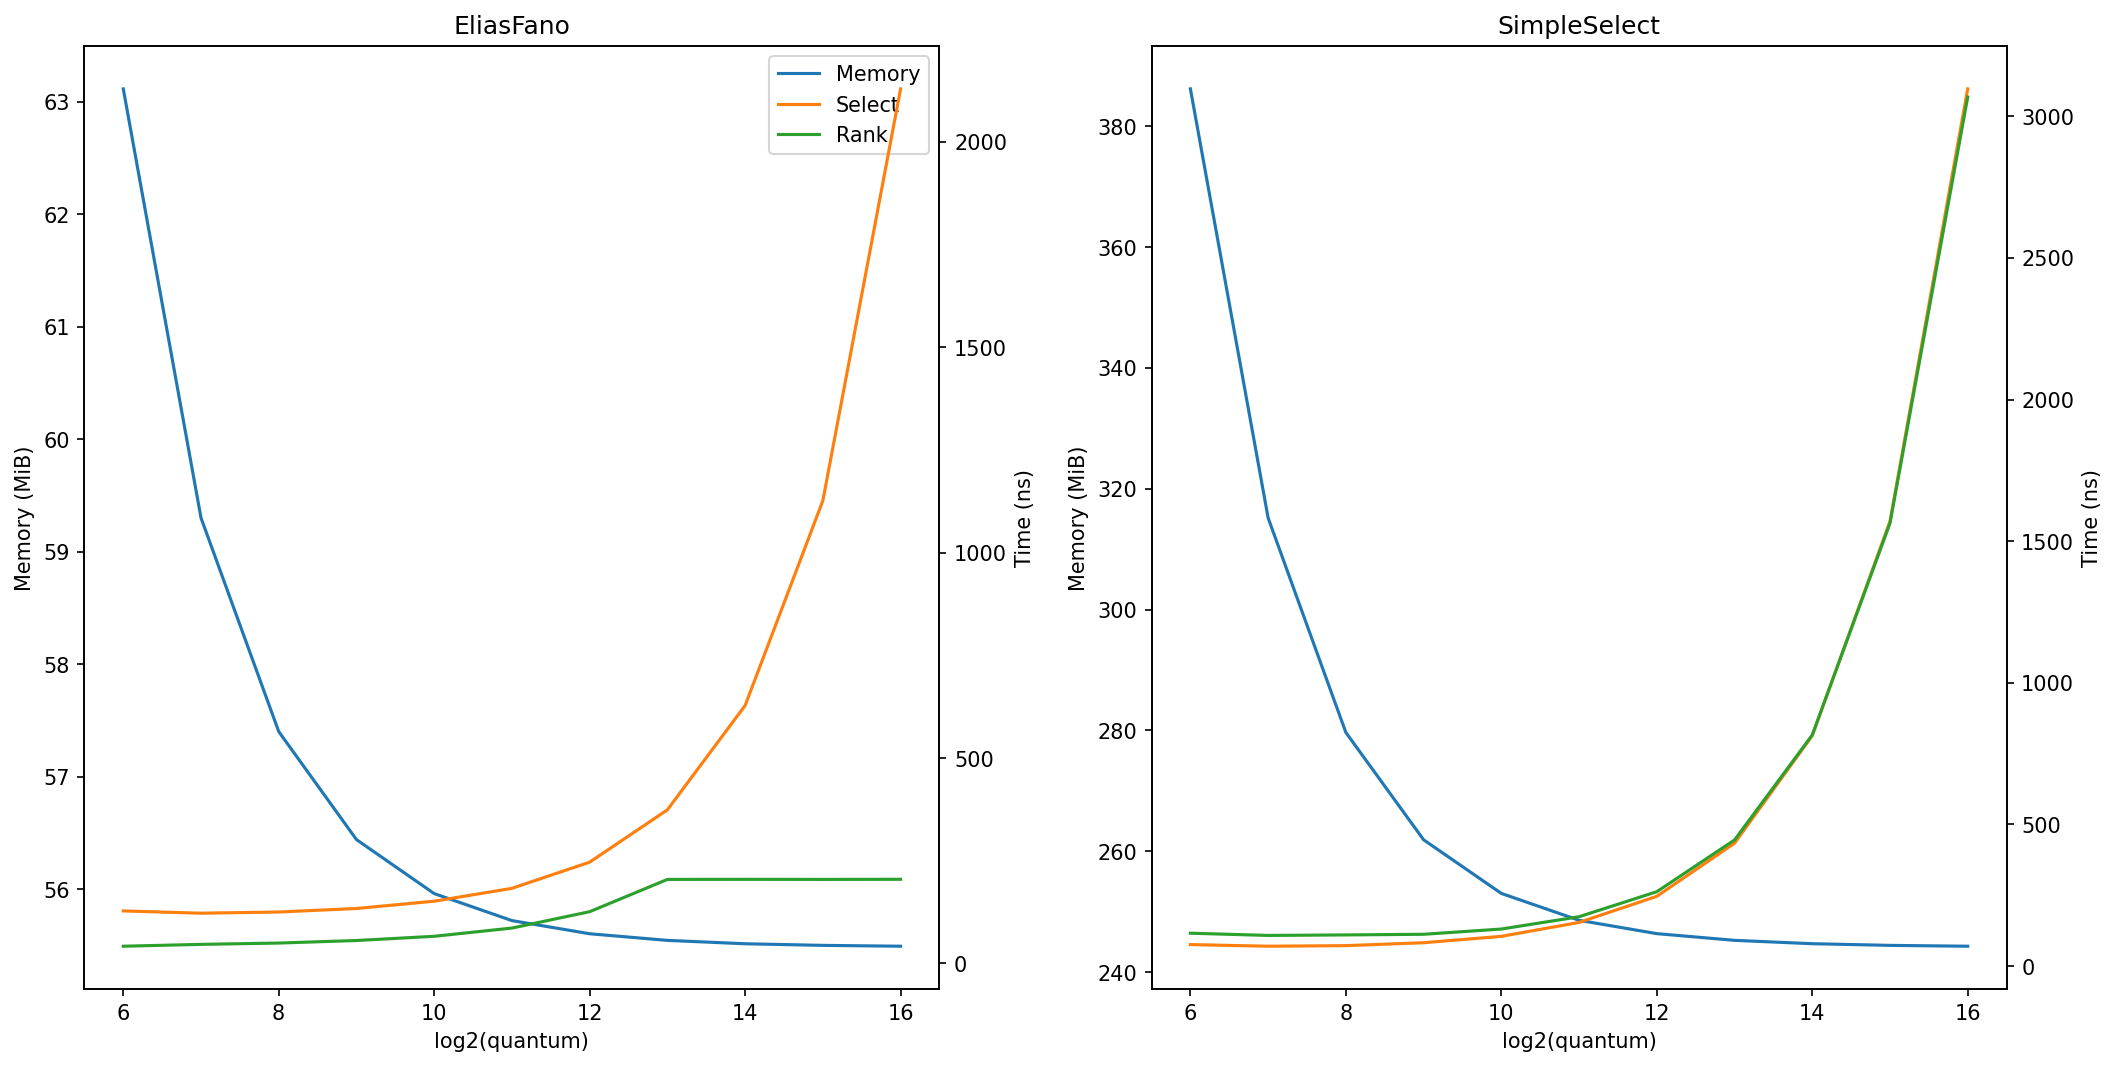

In [20]:
f, (ef, ss) = plt.subplots(1, 2, dpi=150, figsize=(14,7), constrained_layout=True)
ef.set_title("EliasFano")
ef.set_xlabel("log2(quantum)")
line_mem, = ef.plot(df.index, df.ef_memory_Mib, color="tab:blue", label="memory")
ef.set_ylabel("Memory (MiB)")
ef_time = ef.twinx()
line_select, = ef_time.plot(df.index, df.ef_select, color="tab:orange", label="select")
line_rank, = ef_time.plot(df.index, df.ef_rank, color="tab:green", label="rank")
ef_time.set_ylabel("Time (ns)")
ef.legend(
    [line_mem, line_select, line_rank], 
    ["Memory", "Select", "Rank"]

)

ss.set_title("SimpleSelect")
ss.set_xlabel("log2(quantum)")
ss.plot(df.index, df.ss_memory_Mib, color="tab:blue", label="memory")
ss.set_ylabel("Memory (MiB)")
ss_time = ss.twinx()
ss_time.plot(df.index, t(df.ss_select), color="tab:orange", label="select")
ss_time.plot(df.index, t(df.ss_rank), color="tab:green", label="rank")
ss_time.set_ylabel("Time (ns)")

